In [1]:
import tensorflow as tf
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

#from google.colab import files
from keras.preprocessing import image


nrows = 4
ncols = 4

pic_index = 0 

In [2]:
print(len(os.listdir("G:\python NN code+data\male_female_data\Training")))
print(len(os.listdir("G:\python NN code+data\male_female_data\Validation")))


2
2


In [10]:
train_dir="G:\python NN code+data\male_female_data\Training"
#print(len(os.listdir(train_dir)))
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,seed=1,
                                                            image_size=(150,150),
                                                            batch_size=100)


Found 47000 files belonging to 2 classes.


In [9]:
val_dir="G:\python NN code+data\male_female_data\Validation"
#print(len(os.listdir(test_dir)))
val_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,seed=1,
                                                            image_size=(150,150),
                                                            batch_size=100)

Found 11637 files belonging to 2 classes.


In [5]:
test_dir="G:\python NN code+data\male_female_data\Test"
#print(len(os.listdir(test_dir)))
test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_dir,seed=1,
                                                            image_size=(150,150),
                                                            batch_size=100)

Found 200 files belonging to 2 classes.


In [11]:
train_male_fnames = os.listdir(os.path.join(train_dir,'male') )
train_female_fnames = os.listdir( os.path.join(train_dir,'female') )
# Directory with our training cat/dog pictures
train_male_dir = os.path.join(train_dir, 'male')
train_female_dir = os.path.join(train_dir, 'female')

print(train_female_fnames[:10])
print(train_male_fnames[:10])

['131422.jpg.jpg', '131423.jpg.jpg', '131425.jpg.jpg', '131427.jpg.jpg', '131428.jpg.jpg', '131429.jpg.jpg', '131432.jpg.jpg', '131433.jpg.jpg', '131435.jpg.jpg', '131437.jpg.jpg']
['063549.jpg.jpg', '063604.jpg.jpg', '090544.jpg.jpg', '090545.jpg.jpg', '090548.jpg.jpg', '090550.jpg.jpg', '090553.jpg.jpg', '090557.jpg.jpg', '090558.jpg.jpg', '090559.jpg.jpg']


In [12]:
print("Classes of training set {}".format(train_ds.class_names))
class_names=train_ds.class_names

Classes of training set ['female', 'male']


Images of traing set


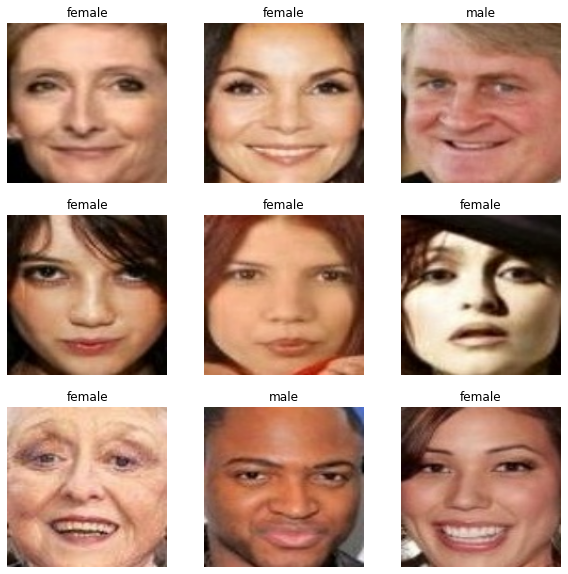

In [13]:
import matplotlib.pyplot as plt
print("Images of traing set")
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Images of test set


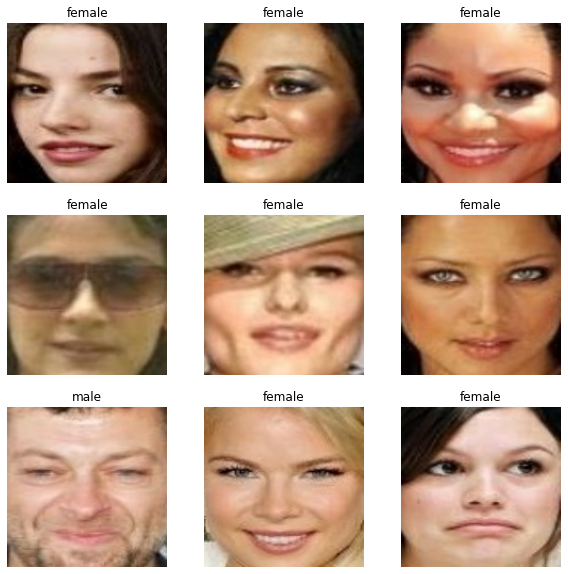

In [14]:
import matplotlib.pyplot as plt
print("Images of test set")
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer =tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0012375193 1.0


In [18]:
model = tf.keras.models.Sequential([ #layer 1
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                   #layer 2
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #layer 3
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)), 
                                    tf.keras.layers.MaxPooling2D(2,2),
    
                                    tf.keras.layers.Flatten(),  #Flatten the result and fit them into Dense Neural network
                                    #layer 4
                                    tf.keras.layers.Dense(2048, activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)), #Dense layer
                                    tf.keras.layers.Dense(1024, activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)), #Dense layer with 1024 hidden units
                                    tf.keras.layers.Dense(512, activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)), #Dense layer with 512 hidden units

                                    #only one output unti due to binary classifaction,
                                    #layer 5
                                    tf.keras.layers.Dense(1, activation='sigmoid',use_bias=True)  

])

In [19]:


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [20]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:

history = model.fit(train_ds,
                              epochs=30,
                              steps_per_epoch=470,  
                              verbose=1,
                              validation_data=val_ds)
    
    
    
    
    
    

Epoch 1/30
470/470 [==============================] - 1257s 3s/step - loss: 0.6916 - acc: 0.7938 - val_loss: 0.3394 - val_acc: 0.8997
Epoch 2/30
470/470 [==============================] - 1292s 3s/step - loss: 0.3200 - acc: 0.9113 - val_loss: 0.2533 - val_acc: 0.9346
Epoch 3/30
470/470 [==============================] - 3210s 7s/step - loss: 0.2585 - acc: 0.9300 - val_loss: 0.2514 - val_acc: 0.9321
Epoch 4/30
470/470 [==============================] - 1130s 2s/step - loss: 0.2384 - acc: 0.9377 - val_loss: 0.1930 - val_acc: 0.9511
Epoch 5/30
470/470 [==============================] - 1125s 2s/step - loss: 0.2188 - acc: 0.9446 - val_loss: 0.2156 - val_acc: 0.9432
Epoch 6/30
470/470 [==============================] - 1126s 2s/step - loss: 0.2005 - acc: 0.9496 - val_loss: 0.1970 - val_acc: 0.9486
Epoch 7/30
470/470 [==============================] - 1123s 2s/step - loss: 0.1899 - acc: 0.9520 - val_loss: 0.1677 - val_acc: 0.9575
Epoch 8/30
470/470 [==============================] - 1144s 2s

In [ ]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]


epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [12]:
model.evaluate(test_ds)\


117/117 [==============================] - 70s 600ms/step - loss: 0.1608 - acc: 0.9609


[0.16083912551403046, 0.960900604724884]

In [34]:
model.save('male_female.h5')